In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#Read Data
df = pd.read_csv('single_binary.csv')

In [3]:
df.isnull().sum
handle = df["married"].median()
df.married = df.married.fillna(handle)


age        0
married    1
dtype: int64

In [13]:
handle = df["married"].median()

In [12]:
df.married = df.married.fillna(handle)

In [16]:
x = df[['age']]
y = df['married']

In [90]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

model = LogisticRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)
model.score(xTest, yTest)

0.75

In [91]:
model.predict_proba(xTest)

array([[0.81357959, 0.18642041],
       [0.99729208, 0.00270792],
       [0.02884882, 0.97115118],
       [0.71484061, 0.28515939]])

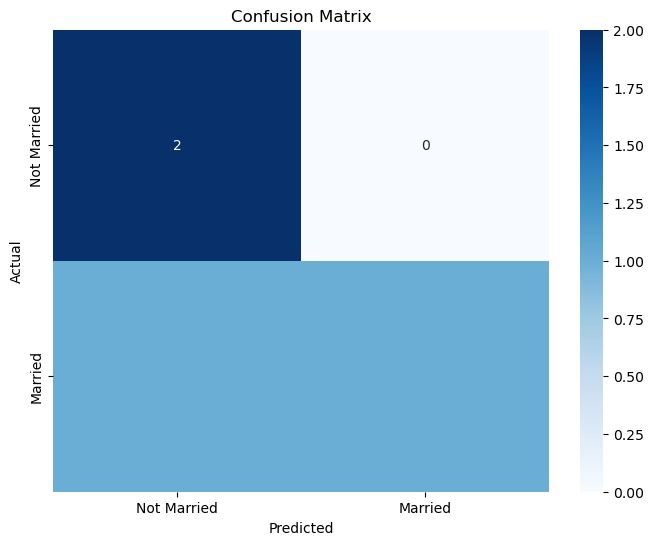

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Married', 'Married'], yticklabels=['Not Married', 'Married'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [88]:
from sklearn.metrics import classification_report

# Generate the classification report
class_report = classification_report(yTest, yPred, target_names=['Not Married', 'Married'])
print(class_report)

              precision    recall  f1-score   support

 Not Married       0.75      0.75      0.75         4
     Married       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6

